indices:
 [[ 0  4  1  2 10  3  6  7  9  5]
 [ 1  0  4  7  3  2  9 10  6  5]
 [ 2  3  7  0  1  4 10  6  9  5]
 [ 3  2  7  1  0  4 10  6  9  5]
 [ 4  0  1 10  6  2  9  3  5  7]
 [ 5  9  6  8  4 10  0  1  2  3]
 [ 6 10  4  8  0  5  9  2  1  3]
 [ 7  3  2  1  0  4 10  9  6  5]
 [ 8  6  5 10  4  9  0  1  2  3]
 [ 9  5  4  0  1  6 10  7  2  8]
 [10  6  4  0  8  2  5  1  3  9]]
Voronoi-adjacent neighbors of point 0: [4, 1, 2, 10, 3, 7, 9, 5]
Position of point 0: [0.64414354 0.38074849]
11 11


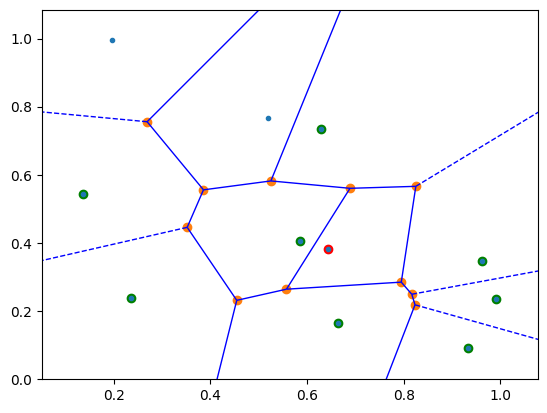

In [2]:
import numpy as np
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi, voronoi_plot_2d, Delaunay
import utils.gradientUtils as gu

def distance_to_bisector(site1, site2, test_point):
    mid_point = (site1 + site2) / 2
    vec = site2 - site1
    vec_norm = np.linalg.norm(vec)
    
    # Check for zero-length vector (i.e., overlapping sites)
    if vec_norm < 1e-9:
        return np.inf  # Large value, indicating no valid bisector

    # Calculate the perpendicular vector
    perp_vec = np.array([-vec[1], vec[0]])  # Perpendicular vector
    perp_vec /= vec_norm  # Normalize the perpendicular vector
    return np.abs(np.dot(test_point - mid_point, perp_vec))

# Generate random Voronoi sites
np.random.seed(30)
points = np.random.rand(11, 2)  # 50 random points in 2D

# Compute KNN for each site (using k=10 as an example)
k = 10
knn = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(points)
distances, indices = knn.kneighbors(points)
print('indices:\n',indices)
# Function to check if two sites are adjacent by the bisector method
def check_voronoi_adjacency(site1_idx, site2_idx, points):
    site1 = points[site1_idx]
    site2 = points[site2_idx]
    # Check if the minimum distance to the bisector is the same for both points
    for i, point in enumerate(points):
        if i != site1_idx and i != site2_idx:
            d1 = distance_to_bisector(site1, site2, points[site1_idx])
            d2 = distance_to_bisector(site1, site2, points[site2_idx])
            # If a point exists closer to the bisector, they are not adjacent
            if d1 != d2 or d1 > distances[site1_idx][1]:  # only nearest neighbor
                return False
    return True

# Iterate over each point and its K nearest neighbors, checking adjacency
adjacent_neighbors = []
for i, neighbors in enumerate(indices):
    valid_neighbors = []
    for neighbor_idx in neighbors:
        if check_voronoi_adjacency(i, neighbor_idx, points):
            valid_neighbors.append(neighbor_idx)
    adjacent_neighbors.append(valid_neighbors)

# Example: print neighbors of a specific point
print(f"Voronoi-adjacent neighbors of point 0: {adjacent_neighbors[0]}")
# position of point 0
print(f"Position of point 0: {points[0]}")

#len of points and len of adjacent_neighbors should be the same
print(len(points), len(adjacent_neighbors))

voronoi_initial = Voronoi(points)
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=True, line_colors='blue')
# Plot the points
#plt.scatter(points[:, 0], points[:, 1], color='blue')
#change color of point 0
plt.scatter(points[0, 0], points[0, 1], color='red')
#scatter adjacent points
for i in adjacent_neighbors[0]:
    plt.scatter(points[i, 0], points[i, 1], color='green')

plt.show()


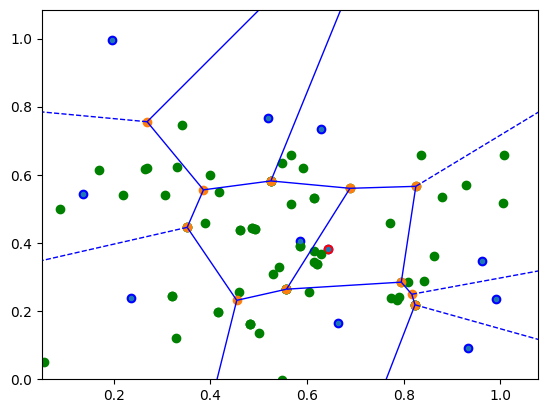

In [3]:
#append random values to a third column of points

points = np.append(points, np.random.uniform(-1, 1, (len(points), 1)), axis=1)
vertices = []



for p in range(len(points)):
    for i in range(len(adjacent_neighbors[p])):
        #if np.sign(points[p][2]) != np.sign(points[adjacent_neighbors[p][i]][2]):
        s_i = points[adjacent_neighbors[p][i],:2]
        s_j = points[p,:2]
        s_k = points[adjacent_neighbors[p][(i+1)%len(adjacent_neighbors[p])],:2]
        v = gu.compute_vertex(s_i, s_j, s_k)
        vertices.append(v)



voronoi_initial = Voronoi(points[:,:2])
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=True, line_colors='blue')
# Plot the points
plt.scatter(points[:, 0], points[:, 1], color='blue')
#change color of point 0
plt.scatter(points[0, 0], points[0, 1], color='red')

#scatter the vertices
vertices = np.array(vertices)
plt.scatter(vertices[:, 0], vertices[:, 1], color='green')

plt.show()

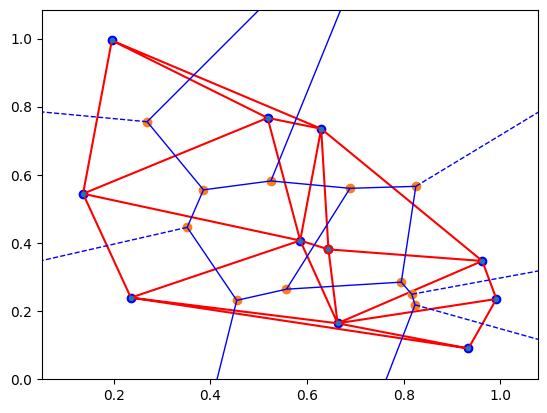

In [4]:
voronoi_initial = Voronoi(points[:,:2])
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=True, line_colors='blue')
# Plot the points
plt.scatter(points[:, 0], points[:, 1], color='blue')
#change color of point 0
plt.scatter(points[0, 0], points[0, 1], color='red')

#scatter the vertices
#vertices = np.array(vertices)
#plt.scatter(vertices[:, 0], vertices[:, 1], color='green')


# Compute Delaunay triangulation
delaunay_triangulation = Delaunay(points[:,:2])

# Plot the Delaunay triangulation
ax.triplot(points[:, 0], points[:, 1], delaunay_triangulation.simplices, color='red')

plt.show()

Neighbors of each Voronoi site:
Site 0 ([0. 0.]): Neighbors [1, 2, 3]
Site 1 ([1. 0.]): Neighbors [0, 2, 4]
Site 2 ([0.5 0.5]): Neighbors [0, 1, 3, 4]
Site 3 ([0. 1.]): Neighbors [0, 2, 4]
Site 4 ([1. 1.]): Neighbors [1, 2, 3]


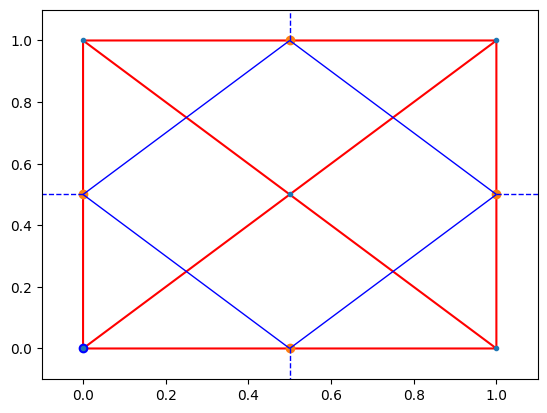

In [5]:
# Example array of points (Voronoi sites)
points = np.array([[0, 0], [1, 0], [0.5, 0.5], [0, 1], [1, 1]])

# Compute the Delaunay triangulation
tri = Delaunay(points)

# Find the neighbors of each point
neighbors = {i: set() for i in range(len(points))}
for simplex in tri.simplices:
    # Each simplex is a triangle of three points; each point is a neighbor of the other two
    for i in range(3):
        for j in range(i + 1, 3):
            neighbors[simplex[i]].add(simplex[j])
            neighbors[simplex[j]].add(simplex[i])

# Convert neighbor sets to lists for easier reading
neighbors = {key: list(value) for key, value in neighbors.items()}

print("Neighbors of each Voronoi site:")
for site, adjacents in neighbors.items():
    print(f"Site {site} ({points[site]}): Neighbors {adjacents}")
    
    

voronoi_initial = Voronoi(points)
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=True, line_colors='blue')
ax.triplot(points[:, 0], points[:, 1], tri.simplices, color='red')
plt.scatter(points[0, 0], points[0, 1], color='blue')

plt.show()

Neighbors of each Voronoi site:
Site 0 ([0.64414354 0.38074849]): Neighbors [1, 10, 2, 4]
Site 1 ([0.66304791 0.16365073]): Neighbors [0, 2, 3, 4, 7, 9]
Site 2 ([0.96260781 0.34666184]): Neighbors [0, 1, 10, 3]
Site 3 ([0.99175099 0.2350579 ]): Neighbors [1, 2, 7]
Site 4 ([0.58569427 0.4066901 ]): Neighbors [0, 1, 5, 6, 9, 10]
Site 5 ([0.13623432 0.54413629]): Neighbors [8, 9, 4, 6]
Site 6 ([0.51817635 0.76685511]): Neighbors [8, 10, 4, 5]
Site 7 ([0.93385014 0.08970338]): Neighbors [1, 3, 9]
Site 8 ([0.19577126 0.99419368]): Neighbors [10, 5, 6]
Site 9 ([0.2351805  0.23898637]): Neighbors [1, 4, 5, 7]
Site 10 ([0.62909983 0.73495258]): Neighbors [0, 2, 4, 6, 8]


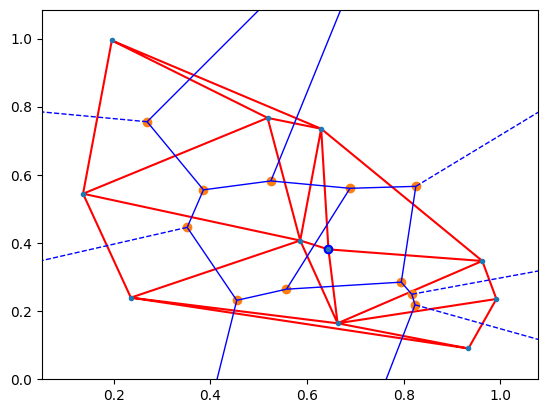

In [6]:
# Example array of points (Voronoi sites)
np.random.seed(30)
points = np.random.rand(11, 2)  


neighbors = gu.get_delaunay_neighbors_list(points)


print("Neighbors of each Voronoi site:")
for site, adjacents in neighbors.items():
    print(f"Site {site} ({points[site]}): Neighbors {adjacents}")
    
    
tri = Delaunay(points)
voronoi_initial = Voronoi(points)
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=True, line_colors='blue')
ax.triplot(points[:, 0], points[:, 1], tri.simplices, color='red')
plt.scatter(points[0, 0], points[0, 1], color='blue')

plt.show()

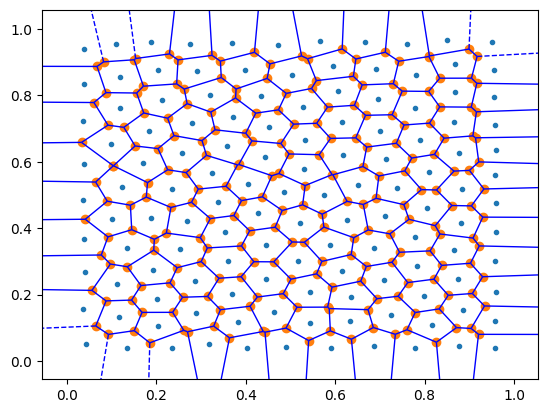

In [7]:
# Python code for creating a CVT
# Vassilis Vassiliades - Inria, Nancy - April 2018

import numpy as np
import matplotlib.pyplot as plt
import sys
from sklearn.cluster import KMeans
import argparse

# Default values
num_centroids = 128
dimensionality = 2
num_samples = 100000
num_replicates = 1
max_iterations = 100
tolerance = 0.0001
verbose = True

X = np.random.rand(num_samples,dimensionality)

kmeans = KMeans(
    init='k-means++', 
    n_clusters=num_centroids, 
    n_init=num_replicates, 
    #n_jobs=-1, 
    max_iter=max_iterations, 
    tol=tolerance,
    verbose=0)

kmeans.fit(X)
centroids = kmeans.cluster_centers_
#print (centroids)

#plt.xlim(0,1)
#plt.ylim(0,1)
#plt.scatter(centroids[:,0], centroids[:,1], s=3)
#plot voronoi of centroids
vor = Voronoi(centroids)
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax, show_vertices=True, line_colors='blue')
# Plot the points
plt.savefig('CVT_'f'{num_centroids}''.png',transparent=True)
plt.show()


Neighbors of each Voronoi site:
Site 0 ([0.95690762 0.56120595]): Neighbors [88, 98, 110, 78]
Site 1 ([0.2690653  0.42044519]): Neighbors [97, 69, 46, 114, 53]
Site 2 ([0.37028149 0.95769195]): Neighbors [34, 107, 80, 51, 90, 27]
Site 3 ([0.68810452 0.3390312 ]): Neighbors [36, 68, 100, 73, 111, 81, 62]
Site 4 ([0.77945986 0.76179669]): Neighbors [72, 42, 108, 86, 59, 63]
Site 5 ([0.77812736 0.03964216]): Neighbors [38, 113, 83, 57, 124, 127]
Site 6 ([0.28049034 0.71811573]): Neighbors [64, 102, 43, 76, 58, 91]
Site 7 ([0.38307309 0.11697696]): Neighbors [65, 70, 109, 56, 122]
Site 8 ([0.04361072 0.05173925]): Neighbors [112, 37, 47]
Site 9 ([0.03696562 0.72359597]): Neighbors [96, 67, 39, 41, 52, 121]
Site 10 ([0.53377063 0.66525416]): Neighbors [99, 40, 48, 55, 120, 125]
Site 11 ([0.87572899 0.24757814]): Neighbors [77, 49, 116, 117, 23, 62]
Site 12 ([0.76140451 0.95462066]): Neighbors [33, 35, 105, 85, 86]
Site 13 ([0.03820357 0.36800554]): Neighbors [101, 39, 74, 44, 47]
Site 14 ([

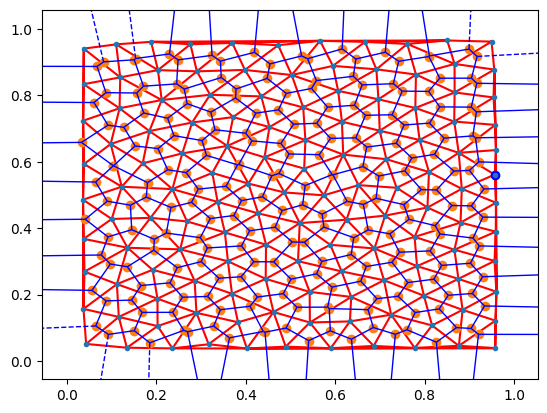

In [8]:

neighbors = gu.get_delaunay_neighbors_list(centroids)


print("Neighbors of each Voronoi site:")
for site, adjacents in neighbors.items():
    print(f"Site {site} ({centroids[site]}): Neighbors {adjacents}")
    
    
tri = Delaunay(centroids)
vor = Voronoi(centroids)
fig, ax = plt.subplots()
voronoi_plot_2d(vor, ax=ax, show_vertices=True, line_colors='blue')
ax.triplot(centroids[:, 0], centroids[:, 1], tri.simplices, color='red')
plt.scatter(centroids[0, 0], centroids[0, 1], color='blue')
plt.show()

### COMPUTE ALL VERTEX FROM NEIGHBORS

Neighbors of each Voronoi site:
Site 0 ([0.64414354 0.38074849]): Neighbors [1, 4, 10, 13, 15]
Site 1 ([0.66304791 0.16365073]): Neighbors [0, 7, 9, 11, 12, 13, 15, 19]
Site 2 ([0.96260781 0.34666184]): Neighbors [10, 3, 12, 15]
Site 3 ([0.99175099 0.2350579 ]): Neighbors [2, 12, 7]
Site 4 ([0.58569427 0.4066901 ]): Neighbors [16, 0, 10, 13]
Site 5 ([0.13623432 0.54413629]): Neighbors [8, 9, 14, 17, 18, 19]
Site 6 ([0.51817635 0.76685511]): Neighbors [8, 10, 16, 17, 18]
Site 7 ([0.93385014 0.08970338]): Neighbors [3, 1, 11, 12]
Site 8 ([0.19577126 0.99419368]): Neighbors [5, 6, 10, 14, 17]
Site 9 ([0.2351805  0.23898637]): Neighbors [1, 5, 11, 14, 19]
Site 10 ([0.62909983 0.73495258]): Neighbors [0, 2, 4, 6, 8, 15, 16]
Site 11 ([0.68834438 0.03113075]): Neighbors [1, 9, 7]
Site 12 ([0.90251384 0.28643533]): Neighbors [1, 2, 3, 7, 15]
Site 13 ([0.55561256 0.37642024]): Neighbors [0, 1, 4, 16, 19]
Site 14 ([0.02662436 0.49414912]): Neighbors [8, 9, 5]
Site 15 ([0.83471509 0.36698733]): N

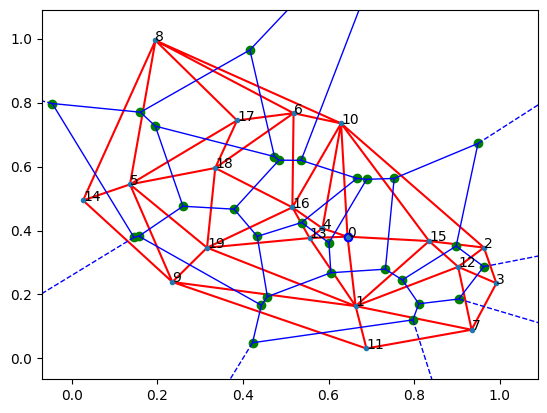

In [9]:
import math
# Example array of points (Voronoi sites)
#points = np.array([[0.1, 0.1], [1.1, 0.1], [0.5, 0.5], [0.1, 1.1], [1.1, 1.1]])
np.random.seed(30)
points = np.random.rand(20, 2) 
neighbors = gu.get_delaunay_neighbors_list(points)

vertices_index_to_compute = []
print("Neighbors of each Voronoi site:")
for site, adjacents in neighbors.items():
    print(f"Site {site} ({points[site]}): Neighbors {adjacents}")
    for i in adjacents:
        sj = points[site]
        for n in adjacents:
            if n != site and n != i and n in neighbors[i]:
                si = points[i]
                sk = points[n]                
                vertices_index_to_compute.append([i,site,n])
        
# Set to store the canonical (sorted) version of each triplet
seen_triplets = set()
# Filtered list to store the unique triplets
filtered_triplets = []
# Process each triplet and keep only one permutation
for triplet in vertices_index_to_compute:
    # Convert the triplet to a canonical form by sorting it
    canonical_triplet = tuple(sorted(triplet, key=str))
    # Check if this canonical triplet has been seen before
    if canonical_triplet not in seen_triplets:
        # If not seen, add it to the set and keep the triplet
        seen_triplets.add(canonical_triplet)
        filtered_triplets.append(triplet)
#print("Filtered triplets without duplicate permutations:", filtered_triplets)

#compute all the vertices
vertices = []
for triplet in filtered_triplets:
    si = points[triplet[0]]
    sj = points[triplet[1]]
    sk = points[triplet[2]]
    v = gu.compute_vertex(si, sj, sk)
    vertices.append(v)

vertices = np.array(vertices)

# Compute the Delaunay triangulation
tri = Delaunay(points)
voronoi_initial = Voronoi(points)
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=False, line_colors='blue')
ax.triplot(points[:, 0], points[:, 1], tri.simplices, color='red')
plt.scatter(points[0, 0], points[0, 1], color='blue')
plt.scatter(vertices[:, 0], vertices[:, 1], color='green')
#annotate the points with their index
for i, txt in enumerate(range(len(points))):
    ax.annotate(txt, (points[i, 0], points[i, 1]))

print("computed vertices:",len(vertices))
print("true vertices:",len(voronoi_initial.vertices))


plt.show()

0


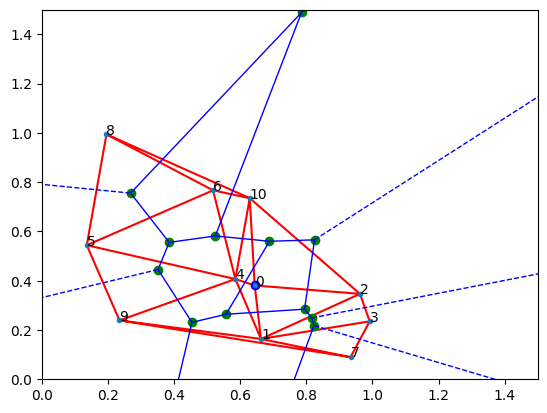

In [10]:
import math
# Example array of points (Voronoi sites)
np.random.seed(30)
points = np.random.rand(11, 2)  

neighbors = gu.get_delaunay_neighbors_list(points)

vertices_index = gu.compute_vertices_index(points, neighbors)
vertices = gu.compute_all_vertices(points, vertices_index)

vertices = np.array(vertices)
#print(vertices)

tri = Delaunay(points)
voronoi_initial = Voronoi(points)
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=False, line_colors='blue')
ax.triplot(points[:, 0], points[:, 1], tri.simplices, color='red')
plt.scatter(points[0, 0], points[0, 1], color='blue')
plt.scatter(vertices[:, 0], vertices[:, 1], color='green')

print(len(vertices) - len(voronoi_initial.vertices))
#annotate the points with their index
for i, txt in enumerate(range(len(points))):
    ax.annotate(txt, (points[i, 0], points[i, 1]))

#scaled plot
plt.xlim(0,1.5)
plt.ylim(0,1.5)


plt.show()

2


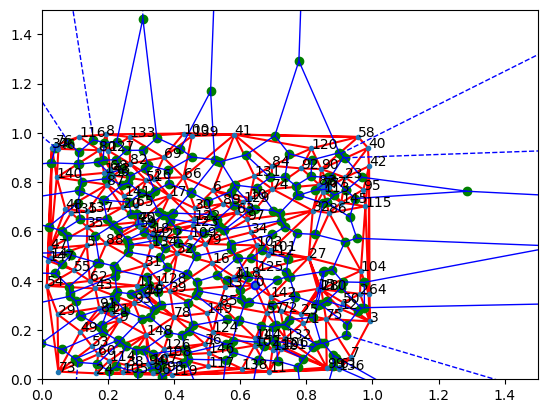

In [18]:
import math
# Example array of points (Voronoi sites)
np.random.seed(30)
points = np.random.rand(150, 2)  

neighbors = gu.get_delaunay_neighbors_list(points)

vertices_index = gu.compute_vertices_index(points, neighbors)
vertices = gu.compute_all_vertices(points, vertices_index)

vertices = np.array(vertices)
#print(vertices)

tri = Delaunay(points)
voronoi_initial = Voronoi(points)
fig, ax = plt.subplots()
voronoi_plot_2d(voronoi_initial, ax=ax, show_vertices=False, line_colors='blue')
ax.triplot(points[:, 0], points[:, 1], tri.simplices, color='red')
plt.scatter(points[0, 0], points[0, 1], color='blue')
plt.scatter(vertices[:, 0], vertices[:, 1], color='green')

print(len(vertices) - len(voronoi_initial.vertices))
#annotate the points with their index
for i, txt in enumerate(range(len(points))):
    ax.annotate(txt, (points[i, 0], points[i, 1]))

#scaled plot
plt.xlim(0,1.5)
plt.ylim(0,1.5)


plt.show()